## 1) Lib importing

In [40]:
from scipy.integrate import odeint
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings("ignore")

## 2) Equation system definition

In [38]:
#Definition of system of linear equations
def dUdt(U,t,σ,β,ρ):
    U0, U1, U2 = U
    
    dU0_dt = σ*(U1-U0)
    dU1_dt = U0*(ρ-U2)-U1
    dU2_dt = U0*U1 - β*U2
    
    return [dU0_dt,dU1_dt,dU2_dt]

## 3) Calculation + graphs

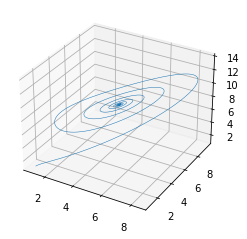

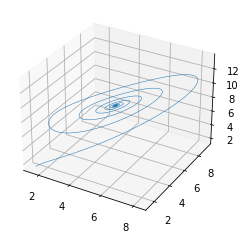

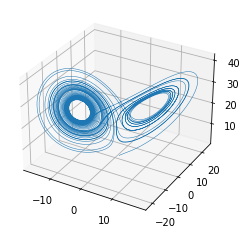

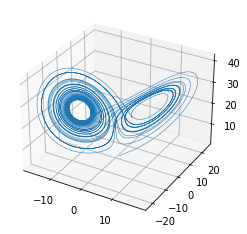

In [44]:
#Constants
σ = 10.0
β = 8./3
ρ = 10

#Initial conditions
conditions= [[1,1,1],[1.5,1.5,1.5],[1,1,1],[1.001,1.001,1.001]]

#Time range
t = np.linspace(0,40,10000)

def graph3D(x,y,z):
    fig = plt.figure()
    qax = fig.gca(projection="3d")
    qax.plot(x,y,z,linewidth=0.5)
    plt.draw()
    plt.show()
    
i=0
answers=[]
for condition in conditions:
    
    answer = odeint(dUdt,condition,t,args=(σ,β,ρ))
    answers.append({"x":answer[:,0],"y":answer[:,1],"z":answer[:,2]})
    graph3D(answer[:,0],answer[:,1],answer[:,2])
    
    i+=1
    if i==2:
        ρ = 25

## 5) Results assertions

To assert our results we're going to graph the residue between the solution to the system of equations for each set of initial conditions.

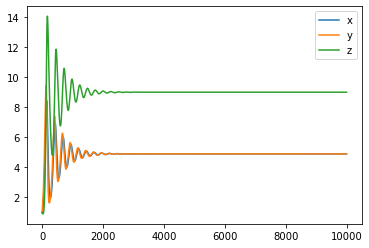

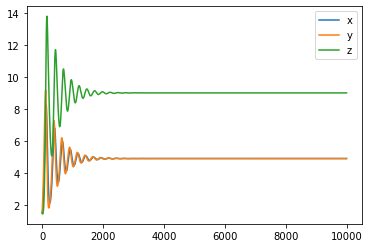

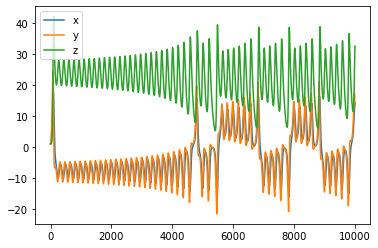

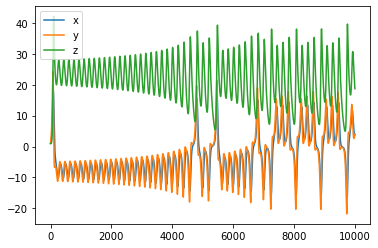

In [47]:
for answer in answers:
    for axis in ["x","y","z"]:
        plt.plot(answer[axis],label=axis)
    plt.legend()
    plt.show()